In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Pruebe si el paquete existe y devuelve la versión o -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.2.3':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

installing pyTEMlib
done


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
if 'google.colab' in sys.modules:
    from google.colab import output
    from google.colab import drive
    output.enable_custom_widget_manager()
    
from matplotlib.patches import Circle

import pyTEMlib
from pyTEMlib import image_tools as it
from pyTEMlib import animation

import scipy.ndimage as ndimage

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
SimpleITK not installed; Registration Functions for Image Stacks not available
install with: conda install -c simpleitk simpleitk 
Using kinematic_scattering library version {_version_ }  by G.Duscher


In [3]:
def make_chi( phi, theta, aberrations):
    maximum_aberration_order = 5
    chi = np.zeros(theta.shape)
    for n in range(maximum_aberration_order+1):  ## Primera suma hasta quinto orden
        term_first_sum = np.power(theta,n+1)/(n+1) # Término en la primera suma
                
        second_sum = np.zeros(theta.shape)  ## Segunda suma inicializada con ceros
        for m in range((n+1)%2,n+2, 2):
            if  m >0: 
                if f'C{n}{m}a' not in aberrations: # Establecer el coeficiente de aberraciones inexistentes en cero
                    aberrations[f'C{n}{m}a'] = 0.
                if f'C{n}{m}b' not in aberrations:
                    aberrations[f'C{n}{m}b'] = 0.
                    
                # Término en segunda suma
                second_sum = second_sum + aberrations[f'C{n}{m}a'] *np.cos(m* phi) + aberrations[f'C{n}{m}b'] *np.sin(m* phi)
            else:
                if f'C{n}{m}' not in aberrations: # Establecer el coeficiente de aberraciones inexistentes en cero
                    aberrations[f'C{n}{m}'] =  0.
                    
                # Término en segunda suma
                second_sum = second_sum + aberrations[f'C{n}{m}']
        chi = chi + term_first_sum * second_sum *2*np.pi/ aberrations['wavelength']
        
    return chi

Text(0.5, 1.0, 'Ronchigrama')

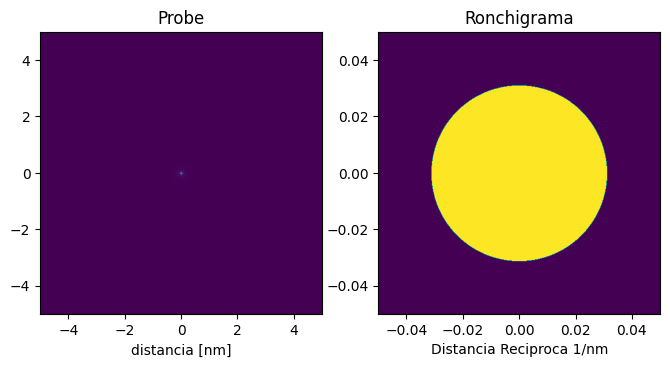

In [4]:
# ---Input  ----
convergence_angle = 40 # in mrad
FOV = 10 # in 1/nm
acceleration_voltage_V = 200000
# ---------------

ApAngle=convergence_angle/1000.0 # in rad

wl = it.get_wavelength(acceleration_voltage_V)
sizeX = sizeY = 512

## Reciprocal plane in 1/nm
dk = 1/FOV
kx = np.array(dk*(-sizeX/2.+ np.arange(sizeX)))
ky = np.array(dk*(-sizeY/2.+ np.arange(sizeY)))
Txv, Tyv = np.meshgrid(kx, ky)

# define reciprocal plane in angles
phi =  np.arctan2(Txv, Tyv)
theta = np.arctan2(np.sqrt(Txv**2 + Tyv**2),1/wl)

## Aperture function 
mask = theta >= ApAngle

aperture =np.ones((sizeX,sizeY),dtype=float)
aperture[mask] = 0.
    
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow((np.abs(np.fft.fftshift(np.fft.ifft2(aperture)))), extent = [-int(FOV/2),int(FOV/2),-int(FOV/2),int(FOV/2)])
ax[0].set_xlabel('distancia [nm]')
ax[0].set_title('Probe')
ax[1].imshow(aperture, extent = [-(1/FOV/2),(1/FOV/2),-(1/FOV/2),(1/FOV/2)])
ax[1].set_xlabel('Distancia Reciproca 1/nm')
ax[1].set_title('Ronchigrama')

Text(0.5, 1.0, 'Ronchigram')

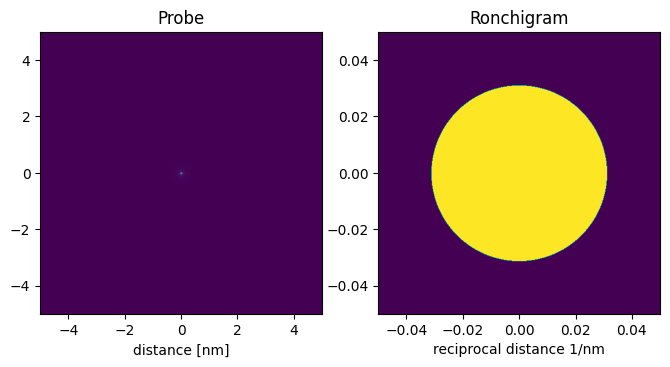

In [5]:
convergence_angle = 40 # en mrad
FOV = 10 # en 1/nm
acceleration_voltage_V = 200000
# ---------------

ApAngle=convergence_angle/1000.0 # en rad

wl = it.get_wavelength(acceleration_voltage_V)
sizeX = sizeY = 512

## Plano reciproco en 1/nm
dk = 1/FOV
kx = np.array(dk*(-sizeX/2.+ np.arange(sizeX)))
ky = np.array(dk*(-sizeY/2.+ np.arange(sizeY)))
Txv, Tyv = np.meshgrid(kx, ky)

# Definir el plano reciproco en angulos
phi =  np.arctan2(Txv, Tyv)
theta = np.arctan2(np.sqrt(Txv**2 + Tyv**2),1/wl)

## Funcion apertura
mask = theta >= ApAngle

aperture =np.ones((sizeX,sizeY),dtype=float)
aperture[mask] = 0.
    
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow((np.abs(np.fft.fftshift(np.fft.ifft2(aperture)))), extent = [-int(FOV/2),int(FOV/2),-int(FOV/2),int(FOV/2)])
ax[0].set_xlabel('distance [nm]')
ax[0].set_title('Probe')
ax[1].imshow(aperture, extent = [-(1/FOV/2),(1/FOV/2),-(1/FOV/2),(1/FOV/2)])
ax[1].set_xlabel('reciprocal distance 1/nm')
ax[1].set_title('Ronchigram')